Install dependencies

In [4]:
#we just need to install tensorflow here
!pip install tensorflow

Imports (in order of use)

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# tensorflow model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# plotting
import matplotlib.pyplot as plt

1. Get your data

In [6]:
# load the dataset we are working on Telco-Customer_Churn

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA's on the data

In [16]:
# view the structure
#print(df.head())
#print(df.info())
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [11]:
# check for missing values DREAM SET!!!
print(df.isnull().sum().sum())

0


# Data pre-processing

In [12]:
# Drop the missing values, if their were any :)
#df = df.dropna()

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Handle Customer ID, it's an ID column and doesnt really mean much
df = df.drop('customerID', axis=1)

In [10]:
#total changes is stored as an object, not good its supposed to be numerical, convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [11]:
# check total charges missing values
print(df['TotalCharges'].isnull().sum())

11


In [12]:
# replace/ handle with mean imputation inplace
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

<ipython-input-12-1fa95054daca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


# Encode your categorical Variables
* Binary Encoding: For columns like gender, Partner, Dependents
* One-Hot Encoding: For columns with multiple categories like InternetService, Contract, and PaymentMethod

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Binary encode the columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


In [15]:
# one hot encode the mult category columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines'], drop_first=True)


In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_1.0
0,0,0,1,0,1,0,0.0,1.0,0.0,0.0,...,29.85,0,False,False,False,False,False,True,False,False
1,1,0,0,0,34,1,1.0,0.0,1.0,0.0,...,1889.50,0,False,False,True,False,False,False,True,False
2,1,0,0,0,2,1,1.0,1.0,0.0,0.0,...,108.15,1,False,False,False,False,False,False,True,False
3,1,0,0,0,45,0,1.0,0.0,1.0,1.0,...,1840.75,0,False,False,True,False,False,False,False,False
4,0,0,0,0,2,1,0.0,0.0,0.0,0.0,...,151.65,1,True,False,False,False,False,True,False,False


# check and address the imbalances if any

In [17]:
# look a little skewy, should probably use SMOTE or undersample
print(df['Churn'].value_counts(normalize=True))

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [12]:
# balance the dataset using SMOTE
#from imblearn.over_sampling import SMOTE

# Feature Scaling
* numerical features tenure, MonthlyCharges, TotalCharges need to be scaled for uniformity

In [13]:
#from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_1.0
0,0,0,1,0,-1.277445,0,0.0,1.0,0.0,0.0,...,-0.994971,0,False,False,False,False,False,True,False,False
1,1,0,0,0,0.066327,1,1.0,0.0,1.0,0.0,...,-0.173876,0,False,False,True,False,False,False,True,False
2,1,0,0,0,-1.236724,1,1.0,1.0,0.0,0.0,...,-0.960399,1,False,False,False,False,False,False,True,False
3,1,0,0,0,0.514251,0,1.0,0.0,1.0,1.0,...,-0.195400,0,False,False,True,False,False,False,False,False
4,0,0,0,0,-1.236724,1,0.0,0.0,0.0,0.0,...,-0.941193,1,True,False,False,False,False,True,False,False


In [20]:
#any missing values after preprocessing?
print(df.isnull().sum().sum())

9156


In [21]:
# handle missing values after preprocessingby filling them
df.fillna(df.mean(), inplace=True)

In [22]:
print(df.isnull().sum().sum())

0


# time to do da *splitz!!*
*ahem*, split the dataset to train it... train|test|split

In [16]:
#from sklearn.model_selection import train_test_split

In [23]:
# dont forget SMOTE for imbalances

X = df.drop('Churn', axis=1)
y = df['Churn']



In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [26]:
# Check the new class dist
print(y_train_balanced.value_counts(normalize=True))

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


# Build the TensorFlow Model!

In [30]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

In [27]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
#complie
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#train and evaluate
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6920 - loss: 0.5531 - val_accuracy: 0.8098 - val_loss: 0.4062
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.4540 - val_accuracy: 0.8084 - val_loss: 0.4023
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4377 - val_accuracy: 0.8141 - val_loss: 0.4013
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4330 - val_accuracy: 0.8162 - val_loss: 0.3988
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4189 - val_accuracy: 0.8119 - val_loss: 0.4027
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7935 - loss: 0.4324 - val_accuracy: 0.8155 - val_loss: 0.4021
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7969 - loss: 0.4335 - val_accuracy: 0.8077 - val_loss: 0.4009
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8097 - loss: 0.4145 - val_accuracy: 0

In [30]:
#evaluation metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8128 - loss: 0.4077
Test Accuracy: 81.05%


# Now for the fun part, plot training history

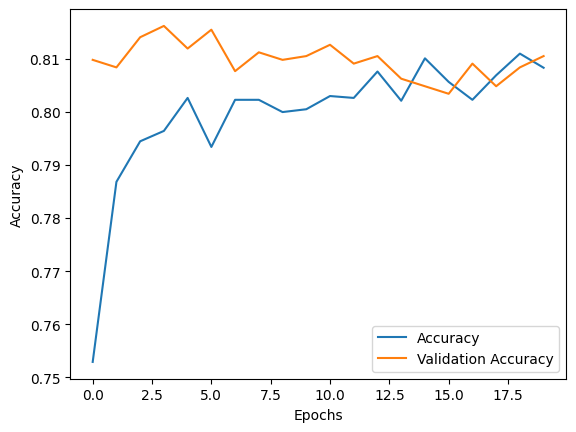

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Save and deploy(mmmmmaybe!)

In [38]:
model.save('churn_prediction_model.keras')

In [ ]:
new_model = tf.keras.models.load_model('churn_prediction_model.keras')
predictions = new_model.predict(X_test)


Version Warning bug:
Becuasuse I used an optimizer with 8 variables, rmsprop stores 14 variables  

Impact of the Warning
Training:
* You can still train the model, but the optimizer state won’t be fully restored. The optimizer will initialize its variables as if starting fresh.

Fine-Tuning:
* If you intended to continue training with the saved optimizer state (e.g., to resume training from a checkpoint), this warning indicates that part of that state wasn’t restored, which could affect performance.

# possible fixes

Ensure Version Consistency

In [2]:
#Ensure Version Consistency
import tensorflow as tf
print(tf.__version__)

2.17.1


Load Model Without Optimizer State

* If you only care about the model weights and not the optimizer, load the model without restoring the optimizer state

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
import warnings


model = load_model('path_to_your_model', compile=False)  # complie to skip loading the optimizer

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='your_loss', metrics=['accuracy'])

warnings.filterwarnings("ignore", category=UserWarning, module="keras.saving.saving_lib")